In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt

In [3]:
stocks = yf.download(["TSLA",'NVDA'],start="2018-03-31", end="2023-04-01")


[*********************100%%**********************]  2 of 2 completed


In [4]:
stocks.head()

Adj Close                 Close                  High             \
                 NVDA       TSLA       NVDA       TSLA       NVDA       TSLA   
Date                                                                           
2018-04-02  54.714649  16.832001  55.262501  16.832001  58.662498  17.355333   
2018-04-03  55.778999  17.835333  56.337502  17.835333  57.587502  18.223333   
2018-04-04  55.999298  19.129333  56.560001  19.129333  56.665001  19.224667   
2018-04-05  54.796345  20.381332  55.345001  20.381332  57.282501  20.417334   
2018-04-06  53.031506  19.953333  53.562500  19.953333  55.400002  20.618668   

                  Low                  Open               Volume             
                 NVDA       TSLA       NVDA       TSLA      NVDA       TSLA  
Date                                                                         
2018-04-02  54.375000  16.306000  57.185001  17.084000  92209200  241710000  
2018-04-03  55.337502  16.966000  56.950001  17.988001  66743200  282666000  
2018-04-04  53.500000  16.799999  53.752499  16.851999  78916800  298450500  
2018-04-05  54.622501  19.213333  57.150002  19.289333  70124000  286816500  
2018-04-06  53.267502  19.700001  54.307499  20.066668  66298800  202804500

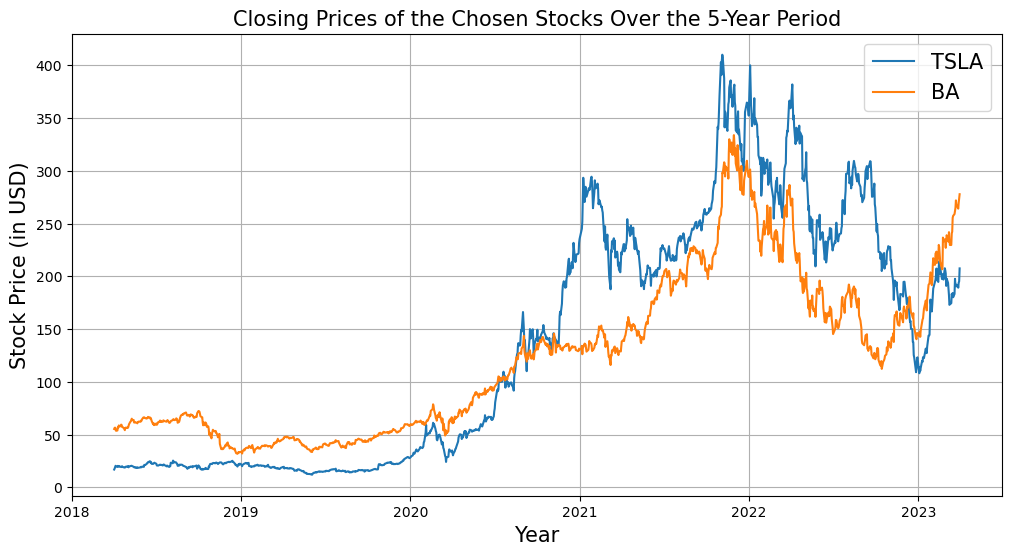

In [6]:
plt.figure(figsize=(12, 6))
plt.title(label="Closing Prices of the Chosen Stocks Over the 5-Year Period",
          fontsize=15)
sns.lineplot(x=stocks.index, y=stocks['Close']['TSLA'], label='TSLA')
sns.lineplot(x=stocks.index, y=stocks['Close']['NVDA'], label='BA')
plt.xlabel("Year",
           fontsize=15)
plt.ylabel("Stock Price (in USD)",
           fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.show()

In [7]:
# getting the closing prices of the first days of each quarter for the chosen stocks
qtr_stocks = stocks.iloc[::63]['Close']
qtr_stocks.head()

,NVDA,TSLA
Date,,
2018-04-02,55.262501,16.832001
2018-06-29,59.224998,22.863333
2018-09-28,70.254997,17.651333
2018-12-31,33.375000,22.186666
2019-04-02,45.750000,19.058666


In [8]:
price_diff_NVDA = qtr_stocks['NVDA'].diff()
price_diff_NVDA

Date
2018-04-02           NaN
2018-06-29      3.962498
2018-09-28     11.029999
2018-12-31    -36.879997
2019-04-02     12.375000
2019-07-02     -5.192501
2019-10-01      2.942501
2019-12-31     15.325001
2020-04-01      1.942501
2020-07-01     34.532501
2020-09-30     40.004990
2020-12-30     -3.847488
2021-04-01      6.659988
2021-07-01     64.002502
2021-09-30      5.040009
2021-12-30     88.699982
2022-03-31    -23.000000
2022-07-01   -127.629990
2022-09-30    -23.839996
2022-12-30     24.750000
Name: NVDA, dtype: float64

In [9]:
# quarterly rate of return for AAPL
# using shift method to get previous quarter's price for the current row
qtr_ror_NVDA = qtr_stocks['NVDA'].diff()/qtr_stocks['NVDA'].shift(periods=1)
qtr_ror_NVDA

Date
2018-04-02         NaN
2018-06-29    0.071703
2018-09-28    0.186239
2018-12-31   -0.524945
2019-04-02    0.370787
2019-07-02   -0.113497
2019-10-01    0.072551
2019-12-31    0.352299
2020-04-01    0.033022
2020-07-01    0.568273
2020-09-30    0.419780
2020-12-30   -0.028436
2021-04-01    0.050663
2021-07-01    0.463392
2021-09-30    0.024936
2021-12-30    0.428171
2022-03-31   -0.077739
2022-07-01   -0.467749
2022-09-30   -0.164153
2022-12-30    0.203888
Name: NVDA, dtype: float64

In [10]:
df_qtr_ror_NVDA = pd.DataFrame(qtr_ror_NVDA)

In [12]:
pd.DataFrame(qtr_ror_NVDA).describe()

,NVDA
count,19.000000
mean,0.098378
std,0.298784
min,-0.524945
25%,-0.053088
50%,0.071703
75%,0.361543
max,0.568273


In [13]:
# expected quarterly rate of return for AAPL for a five-year period
qtr_exp_ror_NVDA = qtr_ror_NVDA.mean()
qtr_exp_ror_NVDA

0.09837803478814382

In [14]:
# quarterly volatility of AAPL for a five-year period
qtr_volatility_NVDA = qtr_ror_NVDA.std()
qtr_volatility_NVDA

0.2987843199059443

In [15]:
# quarterly rate of return for TSLA
# using shift method to get previous quarter's price for the current row
qtr_ror_TSLA = qtr_stocks['TSLA'].diff()/qtr_stocks['TSLA'].shift(periods=1)
qtr_ror_TSLA

Date
2018-04-02         NaN
2018-06-29    0.358325
2018-09-28   -0.227963
2018-12-31    0.256940
2019-04-02   -0.140986
2019-07-02   -0.214531
2019-10-01    0.089691
2019-12-31    0.709632
2020-04-01    0.151149
2020-07-01    1.325006
2020-09-30    0.915856
2020-12-30    0.619496
2021-04-01   -0.047540
2021-07-01    0.024435
2021-09-30    0.143911
2021-12-30    0.380229
2022-03-31    0.006783
2022-07-01   -0.367307
2022-09-30    0.167148
2022-12-30   -0.535608
Name: TSLA, dtype: float64

In [16]:
df_qtr_ror_TSLA = pd.DataFrame(qtr_ror_TSLA)

In [17]:
pd.DataFrame(qtr_ror_TSLA).describe()

,TSLA
count,19.000000
mean,0.190246
std,0.456752
min,-0.535608
25%,-0.094263
50%,0.143911
75%,0.369277
max,1.325006


In [18]:
# expected quarterly rate of return for TSLA for a five-year period
qtr_exp_ror_TSLA = qtr_ror_TSLA.mean()
qtr_exp_ror_TSLA

0.1902456307296535

In [19]:
# quarterly volatility of TSLA for a five-year period
qtr_volatility_TSLA = qtr_ror_TSLA.std()
qtr_volatility_TSLA

0.45675195077220004

In [21]:
# covariance of quarterly returns of AAPL and TSLA for a five-year period
df_qtr_chosen_stocks = pd.concat([df_qtr_ror_NVDA,df_qtr_ror_TSLA],axis=1)
qtr_cov_NVDA_TSLA = df_qtr_chosen_stocks.cov()['NVDA']['TSLA']
qtr_cov_NVDA_TSLA

0.05867106216346732

In [22]:
# Markowitz portfolio optimization
# exp_ror_portfolio = X_a*a_bar + X_b*b_bar
# var_portfolio = (X_a^2*sigma_a^2) + (X_b^2*sigma_b^2) + 2*X_a*X_b*cov_a_b
list_X_a = [i*0.01 for i in range(0,101)]
df_markowitz = pd.DataFrame(list_X_a,columns=['X_a'])
df_markowitz['X_b'] = 1 - df_markowitz['X_a']
df_markowitz['exp_ror_portfolio'] = df_markowitz['X_a']*qtr_exp_ror_NVDA + df_markowitz['X_b']*qtr_exp_ror_TSLA
df_markowitz['qtr_volatity_portfolio'] = (df_markowitz['X_a']**2)*(qtr_volatility_NVDA**2) + (df_markowitz['X_b']**2)*(qtr_volatility_TSLA**2) + 2*df_markowitz['X_a']*df_markowitz['X_b']*qtr_cov_NVDA_TSLA
df_markowitz

,X_a,X_b,exp_ror_portfolio,qtr_volatity_portfolio
0,0.00,1.00,0.190246,0.208622
1,0.01,0.99,0.189327,0.205641
2,0.02,0.98,0.188408,0.202697
3,0.03,0.97,0.187490,0.199788
4,0.04,0.96,0.186571,0.196915
...,...,...,...,...
96,0.96,0.04,0.102053,0.087113
97,0.97,0.03,0.101134,0.087599
98,0.98,0.02,0.100215,0.088120
99,0.99,0.01,0.099297,0.088678


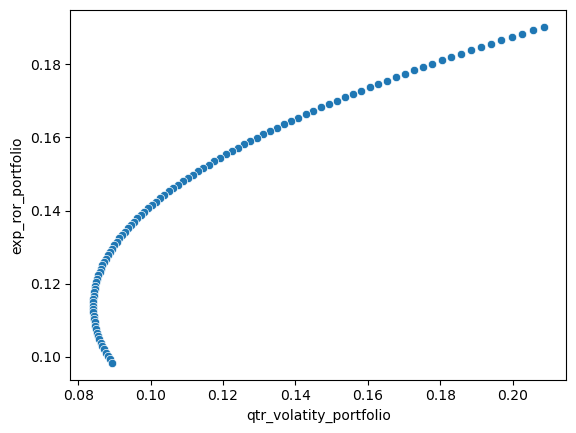

In [23]:
# plotting Risk vs Return
sns.scatterplot(y=df_markowitz['exp_ror_portfolio'],x=df_markowitz['qtr_volatity_portfolio'])
plt.show()

In [24]:
df_markowitz['qtr_volatity_portfolio'].min()

0.0840856883997091

In [25]:
# The ideal weights of your investment
df_markowitz[df_markowitz['qtr_volatity_portfolio'] == df_markowitz['qtr_volatity_portfolio'].min()]

,X_a,X_b,exp_ror_portfolio,qtr_volatity_portfolio
83,0.83,0.17,0.113996,0.084086
